In [1]:
import pandas as pd
import requests
from pathlib import Path
import tarfile

In [2]:
# downloads https://static.crates.io/db-dump.tar.gz
# and extracts the files "crates.csv" and "crate_downloads.csv" from the archive to ./db-dump


def tar_extract_to_path(tarfile: tarfile.TarFile, member_name: str, output_path: str):
    member = tarfile.getmember(member_name)
    with tarfile.extractfile(member) as f:
        with open(output_path, "wb+") as out:
            out.write(f.read())


archive_url = "https://static.crates.io/db-dump.tar.gz"
archive_path = "./db-dump.tar.gz"
extract_dir = "./db-dump"
crates_csv = f"{extract_dir}/crates.csv"
crate_downloads_csv = f"{extract_dir}/crate_downloads.csv"
did_download = False
if not Path(archive_path).exists():
    response = requests.get(archive_url)
    with open(archive_path, "wb+") as f:
        f.write(response.content)
    did_download = True
# download the archive
if did_download or (
    not Path(crates_csv).exists() or not Path(crate_downloads_csv).exists()
):
    # extract the archive
    if not Path(extract_dir).exists():
        Path(extract_dir).mkdir()
    with tarfile.open(archive_path, "r:gz") as tar:
        tar_crates_path = [m for m in tar.getnames() if "crates.csv" in m][0]
        tar_crate_downloads_path = [
            m for m in tar.getnames() if "crate_downloads.csv" in m
        ][0]
        tar_extract_to_path(tar, tar_crates_path, crates_csv)
        tar_extract_to_path(tar, tar_crate_downloads_path, crate_downloads_csv)

In [3]:
crates = pd.read_csv(crates_csv)
downloads = pd.read_csv(crate_downloads_csv)

In [4]:
joined = crates.merge(downloads, left_on="id", right_on="crate_id")

In [5]:
joined[(joined.downloads > 1e7) & (joined.downloads < 1e8)].sample(10)

,created_at,description,documentation,homepage,id,max_features,max_upload_size,name,readme,repository,updated_at,crate_id,downloads
142954,2020-06-18 13:47:34.447495+00,Sentry integration and utilities for dealing w...,NaN,https://sentry.io/welcome/,255333,NaN,NaN,sentry-backtrace,"<p align=""center"">\n <a href=""https://sentry....",https://github.com/getsentry/sentry-rust,2025-01-07 15:45:22.90335+00,255333,18479249
61381,2018-06-22 17:38:56.065914+00,Unix signal handling,https://docs.rs/signal-hook,NaN,71297,NaN,NaN,signal-hook,# Signal-hook\n\n[![Actions Status](https://gi...,https://github.com/vorner/signal-hook,2023-07-18 15:21:46.884143+00,71297,71778870
141764,2022-02-18 22:04:24.504315+00,The interface macro for the windows crate,NaN,NaN,534913,NaN,NaN,windows-interface,NaN,https://github.com/microsoft/windows-rs,2025-03-18 14:24:38.800042+00,534913,15856476
148123,2019-08-16 23:25:11.928095+00,Binary Object Representation Serializer for Ha...,NaN,https://borsh.io,157492,NaN,NaN,borsh,# Borsh in Rust &emsp; [![Latest Version]][cra...,https://github.com/near/borsh-rs,2025-03-25 10:55:50.32589+00,157492,41309658
150850,2019-09-17 19:59:37.30836+00,the BLAKE3 hash function,https://docs.rs/blake3,NaN,165535,NaN,NaN,blake3,# BLAKE3\n\nBLAKE3 is a cryptographic hash fun...,https://github.com/BLAKE3-team/BLAKE3,2025-03-18 18:30:40.244398+00,165535,47167226
30899,2022-07-22 14:49:20.508197+00,Out reference,NaN,NaN,630837,NaN,NaN,outref,# outref\n\n[![Latest Version]][crates.io]\n[!...,https://github.com/Nugine/outref,2025-01-15 09:06:04.205242+00,630837,31533633
69011,2020-02-24 03:26:45.809913+00,Trait generalization over the primitive types,https://docs.rs/funty,https://ferrilab.github.io/ferrilab,211920,NaN,NaN,funty,"<div style=""text-align: center;"" align=""center...",https://github.com/ferrilab/ferrilab,2023-01-29 04:40:16.975264+00,211920,82811895
17151,2019-08-13 22:32:41.629643+00,POLYVAL is a GHASH-like universal hash over GF...,https://docs.rs/polyval,NaN,156600,NaN,NaN,polyval,# RustCrypto: POLYVAL\n\n[![crate][crate-image...,https://github.com/RustCrypto/universal-hashes,2024-07-26 21:05:43.315869+00,156600,53908594
158193,2018-08-08 08:37:18.281238+00,Open a file or link using the system default p...,NaN,NaN,78322,NaN,NaN,opener,# Opener\n\nThis crate provides the ability to...,https://github.com/Seeker14491/opener,2024-08-06 02:50:46.614005+00,78322,14823895
32124,2018-08-15 23:40:43.114488+00,Composable proof transcripts for public-coin a...,https://docs.rs/merlin,https://docs.rs/merlin,79662,NaN,NaN,merlin,"<img\n width=""33%""\n align=""right""\n src=""http...",https://github.com/zkcrypto/merlin,2021-01-28 20:43:26.299029+00,79662,14084187


In [6]:
print("Max", joined.downloads.max())
print("Min", joined.downloads.min())
print("Median", joined.downloads.median())
print("Average", joined.downloads.mean())
print("Std", joined.downloads.std())

Max 799812884
Min 0
Median 3379.0
Average 690623.3153754267
Std 10844017.718376163


In [7]:
# Get at most 10 crates with downloads within 1000 of the median
median = joined.downloads.median()
(
    joined[
        (joined.downloads > median - 1000) & (joined.downloads < median + 1000)
    ].sample(10)
)

,created_at,description,documentation,homepage,id,max_features,max_upload_size,name,readme,repository,updated_at,crate_id,downloads
132610,2022-02-07 18:28:48.417442+00,Persist serializable in-memory data in JSON fo...,NaN,NaN,528540,NaN,NaN,jsave,# jsave\nPersist serializable in-memory data i...,https://github.com/EAimTY/jsave,2022-02-27 11:47:45.770376+00,528540,3778
68262,2024-02-28 06:14:55.085095+00,Rust wrapper for libpcapng library,NaN,NaN,1156138,NaN,NaN,libpcapng-rs,# API Wrapper for [libpcapng](https://github.c...,https://github.com/jumpespllc/libpcapng-rs,2024-02-28 16:23:25.224942+00,1156138,3007
57997,2020-03-26 23:22:39.617712+00,Decodes audio files using ffmpeg with rust. Ca...,https://docs.rs/ffmpeg-decoder,NaN,223309,NaN,NaN,ffmpeg-decoder,# ffmpeg-decoder\n[![Crates.io](https://img.sh...,https://github.com/tarkah/ffmpeg-decoder-rs,2020-09-16 21:40:06.291146+00,223309,4229
124857,2023-03-02 03:14:53.546863+00,xxx,https://docs.rs/caffe2op-activation,NaN,798583,NaN,NaN,caffe2op-activation,This rust crate provides mathematical operator...,https://github.com/kleb6/caffe2-rs,2023-03-25 12:37:21.792766+00,798583,3204
74803,2024-02-21 04:41:12.153752+00,A Frame wallet client written in rust to progr...,https://docs.rs/frame-rs,NaN,1147532,NaN,NaN,frame_rs,# Frame-rs\n\n`frame-rs` is a Rust library des...,https://github.com/AnonJon/frame-rs,2024-03-11 20:24:17.053642+00,1147532,3094
172623,2024-10-23 23:44:29.178556+00,Python client for BulletinBoard,NaN,NaN,1420708,NaN,NaN,bulletin-board-python,"# Python client for BulletinBoard\n\n[![""Buy M...",https://github.com/YShoji-HEP/BulletinBoard,2025-03-06 16:09:12.135699+00,1420708,2697
19802,2019-01-02 23:14:50.846169+00,Granular locking crate for Rust,NaN,NaN,105125,NaN,NaN,glock,# glock\nGranular locking crate for Rust. Inst...,https://github.com/aymanmadkour/glock,2019-01-03 23:09:21.981365+00,105125,3506
84160,2022-02-27 14:17:26.761597+00,A CSS AST visitor for visit the AST produced b...,NaN,NaN,540370,NaN,NaN,tele_visit,NaN,https://github.com/telecss/telecss,2022-03-26 09:26:41.578192+00,540370,2394
68910,2021-05-13 19:36:02.907215+00,The Rust macro toolkit.,https://docs.rs/macrotk,https://github.com/frostu8/macrotk,397081,NaN,NaN,macrotk,# macrotk\nAn extensible macro toolkit for Rus...,https://github.com/frostu8/macrotk.git,2021-05-15 17:32:11.095284+00,397081,3074
93452,2023-09-07 17:11:52.100501+00,Simple program to analyze all of your osu file...,NaN,https://github.com/Raregendary/SimpleBeatmapAn...,966410,NaN,NaN,SimpleBeatmapAnalyzer,![banner](https://github.com/Raregendary/Simpl...,https://github.com/Raregendary/SimpleBeatmapAn...,2023-09-14 22:38:17.662164+00,966410,2911


In [8]:
# Get at most 10 crates within one standard deviation of the mean
mean = joined.downloads.mean()
std = joined.downloads.std()

joined[(joined.downloads > mean - std) & (joined.downloads < mean + std)].head(10)

,created_at,description,documentation,homepage,id,max_features,max_upload_size,name,readme,repository,updated_at,crate_id,downloads
0,2023-02-26 04:29:18.830144+00,"A non-intrusive declarative GUI framework, to ...",https://ribir.org/docs/introduction,https://ribir.org,794842,NaN,NaN,ribir_painter,"<h1 align=""center"">\nRibir - Non-intrusive GUI...",https://github.com/RibirX/Ribir/painter,2025-03-26 00:49:26.576524+00,794842,43770
1,2023-05-01 12:06:24.629411+00,Crate name reserved\n,NaN,NaN,853351,NaN,NaN,madara,"<p align=""center"">\n <h1 align=""center"">madar...",NaN,2023-05-01 12:06:24.629411+00,853351,1066
2,2023-05-24 06:42:04.039181+00,Rust structure mapped to Swagger,NaN,https://github.com/denganjia/openapi-schema,872703,NaN,NaN,openapi-schema,# OpenApi-Schema\n\nRust structure mapped to o...,https://github.com/denganjia/openapi-schema,2023-06-21 02:13:09.838873+00,872703,9585
3,2024-02-25 16:14:19.767307+00,Wappu is a fast and flexible web scraping libr...,NaN,NaN,1152587,NaN,NaN,wappu,# Wappu: A Rust Web Scraping Library\n\nWappu ...,NaN,2024-03-31 16:25:27.380231+00,1152587,6510
4,2024-03-13 10:12:48.064691+00,Provides assets management functionality for F...,NaN,https://konceptosociala.eu.org/flatbox,1171587,NaN,NaN,flatbox_assets,NaN,https://github.com/konceptosociala/flatbox,2024-03-13 10:12:48.064691+00,1171587,1530
5,2024-03-25 13:26:39.711734+00,Swap Bevy Worlds at runtime,NaN,NaN,1185299,NaN,NaN,bevy_worldswap,# Bevy World-Swap\n\nSwap an app's `World` at ...,https://github.com/UkoeHB/bevy_worldswap,2024-03-25 13:26:39.711734+00,1185299,1086
6,2024-04-14 16:41:03.430624+00,"Just an example repository, on how rust docs w...",NaN,NaN,1208368,NaN,NaN,comments_rust_docs,NaN,NaN,2024-04-14 16:41:03.430624+00,1208368,1014
7,2024-03-13 12:56:00.940663+00,Unofficial Lua 5.4 unsafe bindings,NaN,NaN,1171666,NaN,NaN,lua54-sys,NaN,NaN,2024-03-13 13:00:51.309345+00,1171666,1968
8,2024-03-13 11:23:56.402703+00,An async implementation of a rqlite client,https://docs.rs/rqlite/,https://codeberg.org/zesty/rqlite-rs,1171622,NaN,NaN,rqlite-ha421,# rqlite-ha421\na temporary fork of rqlite-rs\...,https://codeberg.org/zesty/rqlite-rs,2024-03-13 15:55:37.648138+00,1171622,2830
9,2024-03-17 19:53:15.17254+00,Test,NaN,NaN,1176759,NaN,NaN,minigrepsada,NaN,NaN,2024-03-17 19:57:51.706603+00,1176759,2889


In [9]:
crates

,created_at,description,documentation,homepage,id,max_features,max_upload_size,name,readme,repository,updated_at
0,2023-02-26 04:29:18.830144+00,"A non-intrusive declarative GUI framework, to ...",https://ribir.org/docs/introduction,https://ribir.org,794842,NaN,NaN,ribir_painter,"<h1 align=""center"">\nRibir - Non-intrusive GUI...",https://github.com/RibirX/Ribir/painter,2025-03-26 00:49:26.576524+00
1,2023-05-01 12:06:24.629411+00,Crate name reserved\n,NaN,NaN,853351,NaN,NaN,madara,"<p align=""center"">\n <h1 align=""center"">madar...",NaN,2023-05-01 12:06:24.629411+00
2,2023-05-24 06:42:04.039181+00,Rust structure mapped to Swagger,NaN,https://github.com/denganjia/openapi-schema,872703,NaN,NaN,openapi-schema,# OpenApi-Schema\n\nRust structure mapped to o...,https://github.com/denganjia/openapi-schema,2023-06-21 02:13:09.838873+00
3,2024-02-25 16:14:19.767307+00,Wappu is a fast and flexible web scraping libr...,NaN,NaN,1152587,NaN,NaN,wappu,# Wappu: A Rust Web Scraping Library\n\nWappu ...,NaN,2024-03-31 16:25:27.380231+00
4,2024-03-13 10:12:48.064691+00,Provides assets management functionality for F...,NaN,https://konceptosociala.eu.org/flatbox,1171587,NaN,NaN,flatbox_assets,NaN,https://github.com/konceptosociala/flatbox,2024-03-13 10:12:48.064691+00
...,...,...,...,...,...,...,...,...,...,...,...
175795,2023-05-09 15:53:38.463093+00,Wrappers and helper functions for physical and...,https://docs.rs/memory_addr,https://github.com/arceos-org/arceos,860647,NaN,NaN,memory_addr,# memory_addr\n\n[![Crates.io](https://img.shi...,https://github.com/arceos-org/axmm_crates,2025-03-07 04:24:22.388427+00
175796,2025-03-07 04:32:32.939317+00,Azure Resource Manager client SDK for Azure re...,https://docs.rs/azure_resourcemanager_sphere,https://github.com/azure/azure-sdk-for-rust,1582341,NaN,NaN,azure_resourcemanager_sphere,# Microsoft Azure Key Vault management client ...,https://github.com/azure/azure-sdk-for-rust,2025-03-07 04:32:32.939317+00
175797,2024-11-28 01:21:55.952055+00,A crate for connecting to and communicating wi...,NaN,https://github.com/NotQuiteApex/picoboot-rs,1463788,NaN,NaN,picoboot-rs,# picoboot-rs &ensp; [![github]](https://githu...,https://github.com/NotQuiteApex/picoboot-rs.git,2025-03-07 04:26:50.636427+00
175798,2024-11-25 03:40:33.766213+00,The Essential VM,NaN,https://essential.builders/,1459863,NaN,NaN,essential-vm,# essential-vm\n\n[![Crates.io][crates-badge]]...,https://github.com/essential-contributions/ess...,2025-03-07 05:34:46.034925+00


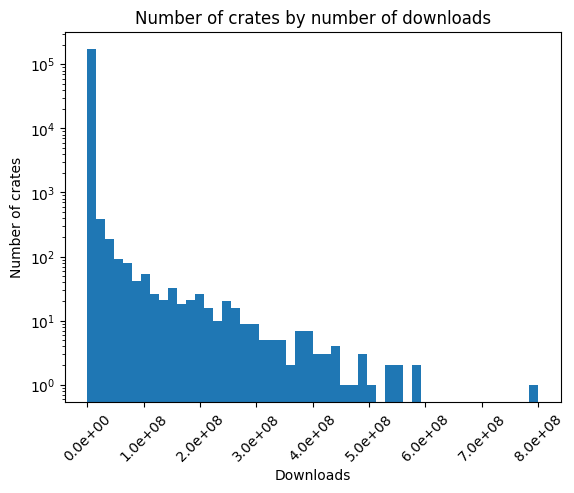

In [ ]:
# Create a bar graph with the number of downloads on the x axis and the number of crates in a bin on the y axis. Use an appropriate number of bins.
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.hist(joined.downloads[joined.downloads > 0], bins=50)
plt.yscale("log")
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1e"))
plt.xticks(rotation=45)
plt.xlabel("Downloads")
plt.ylabel("Number of crates")
plt.title("Number of crates by number of downloads")
plt.show()

In [12]:
joined.downloads[joined.downloads > 1000]

0         43770
1          1066
2          9585
3          6510
4          1530
          ...  
175793     7150
175795    35963
175797     1292
175798     2527
175799    11583
Name: downloads, Length: 156945, dtype: int64